In [59]:
import os
# import glob

data_dir = "data"

file_dirs = glob.glob(os.path.join(data_dir, "*.txt"))

def filter_file_n(type_l):
    return list(filter(lambda x: type_l in x, file_dirs))

def read_files(filen_l):
    data = []
    for filen in filen_l:
        with open(filen, 'r') as filen_w:
            data.extend(filen_w.read().splitlines())
    print(len(data), " records extracted.")
    return data

data = {}
for dtype in ["name", "uuid", "email"]:
    data[dtype] = read_files(filter_file_n(dtype))


4945  records extracted.
1000  records extracted.
3618  records extracted.


In [19]:
import random
from itertools import chain
import numpy as np
import string

In [64]:
def mutate_data(datal, append_ori=True, shuffle=True, static_special=True):
    specialChars = set(string.punctuation)
    datal_n = []
    n_mutations = 20
    alphabet = sorted(set(chain(*datal)))
    for datap in datal:
        datap_c = list(datap)
        for _ in range(n_mutations):
            if (random.random() > 0.5):
                m_ind = random.randint(0, len(datap_c)-1)
                if static_special and (datap_c[m_ind] not in specialChars):
                    datap_c[m_ind] = alphabet[(alphabet.index(datap_c[m_ind]) + random.randint(0, len(alphabet))) % len(alphabet)]
                    ind = alphabet.index(datap_c[m_ind])
                    while alphabet[ind] in specialChars:
                        ind+=1
                    datap_c[m_ind] = alphabet[ind]
                        
        datal_n.append("".join(datap_c))
    if append_ori:
        datal_n.extend(datal)
    if shuffle:
        np.random.shuffle(datal_n)
    print("mutated data length: %d"%(len(datal_n)))
    return datal_n

exclude_list = set(["name"])
mutated_data = {k: mutate_data(v) for k, v in data.items() if k not in exclude_list}
mutated_data.update({k: data[k] for k in exclude_list})


mutated data length: 7236
mutated data length: 2000


In [65]:
def generate_labeled_data(data):
    X_data = []
    y_data = []
    class_labels = {}
    class_count = 0
    for k, v in data.items():
        if k not in class_labels:
            class_labels[k] = class_count
            class_count += 1
        y_data.extend([class_labels[k] for _ in v])
        X_data.extend(v)
    return X_data, y_data, class_labels
X_data, y_data, class_labels = generate_labeled_data(mutated_data)
print(len(X_data))
print(len(y_data))

14181
14181


In [66]:
print(class_labels)
offset = 1998
print(X_data[offset:offset+5], y_data[offset:offset+5])

{'email': 1, 'uuid': 0, 'name': 2}
['ae96c944-3945-4075-8c6d-c5259501533e', '0182dc3c-3e24-11e8-9eb6-5692498b6459', 'webindia123.com', 'xaip2delicm9o4.bom', 'mail2gina.com'] [0, 0, 1, 1, 1]


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 2000.,     0.,     0.,     0.,     0.,  7236.,     0.,     0.,
            0.,  4945.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

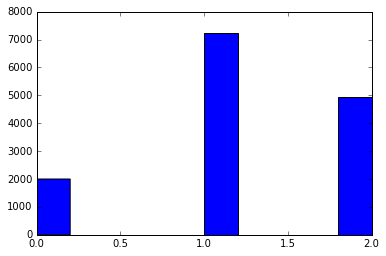

In [67]:
plt.hist(y_data)

In [70]:
import tensorflow as tf
import tensorflow.contrib.keras as keras

In [73]:
tokenizer = keras.preprocessing.text.Tokenizer(filters='', char_level=True)
tokenizer.fit_on_texts(X_data)
print(tokenizer.word_index)

{'X': 65, '9': 11, '2': 9, 'e': 1, 'E': 48, 'w': 33, 'g': 30, '7': 26, 'h': 28, 'B': 47, '1': 12, 'A': 40, 'Z': 60, 'S': 44, 'O': 58, 'a': 2, 'o': 6, 'Q': 63, 'N': 52, 'D': 43, '.': 8, 'q': 38, 'L': 42, 's': 24, 'l': 10, '6': 19, 'd': 23, 'b': 13, 'T': 51, 'f': 17, 'M': 39, 'x': 36, 'I': 57, 'm': 3, 'U': 62, 'K': 46, '5': 20, '4': 15, 'P': 55, 'v': 34, 'C': 41, 'R': 49, 'y': 27, '0': 16, 'W': 59, 'c': 4, 'r': 18, 'i': 5, 'z': 35, '3': 25, ' ': 64, 't': 22, 'J': 45, 'G': 50, 'Y': 61, 'F': 53, '8': 21, 'k': 32, 'n': 14, '-': 7, 'j': 37, 'V': 56, 'H': 54, 'u': 29, 'p': 31}


In [116]:
X_tokens = tokenizer.texts_to_sequences(X_data)
vocab_size = len(tokenizer.word_index.items())
rev_word_index = {v:k for k, v in tokenizer.word_index.items()}
def token_to_text(tokens):
    return "".join([rev_word_index[tok] for tok in tokens])
print(token_to_text(X_tokens[0]))   
print((X_tokens[0]))
print(vocab_size)

63cef988-0a79-4c71-895c-4dd1090d63d6
[19, 25, 4, 1, 17, 11, 21, 21, 7, 16, 2, 26, 11, 7, 15, 4, 26, 12, 7, 21, 11, 20, 4, 7, 15, 23, 23, 12, 16, 11, 16, 23, 19, 25, 23, 19]
65


In [80]:
num_classes=len(class_labels.keys())
y_onehot = keras.utils.to_categorical(y_data, num_classes=num_classes)

print(y_onehot[0])

[ 1.  0.  0.]


In [82]:
mx_tokens = len(max(X_tokens, key=lambda x: len(x)))

36


In [83]:
X_data_pad = keras.preprocessing.sequence.pad_sequences(X_tokens, maxlen=mx_tokens, padding='pre')

In [96]:
print(X_data_pad.shape)
print(y_onehot.shape)

(14181, 36)
(14181, 3)


In [111]:
from sklearn.model_selection import train_test_split

test_ratio = 0.1
y_data = np.array(y_data, dtype=np.int32)

X_train, X_test, y_train, y_test = train_test_split(X_data_pad, y_onehot, test_size=test_ratio, stratify=y_data, shuffle=True, random_state=100)
print(X_train.shape, len(y_train), X_test.shape, len(y_test))

(12762, 36) 12762 (1419, 36) 1419


(array([ 200.,    0.,    0.,    0.,    0.,  724.,    0.,    0.,    0.,  495.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

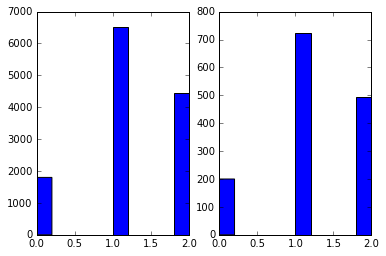

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(np.argmax(y_train, axis=1))
ax2.hist(np.argmax(y_test, axis=1))

In [127]:
embedding_size = 8

model = keras.models.Sequential()

model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=mx_tokens, name="embedding"))

model.add(keras.layers.Conv1D(64, 2, activation='relu'))
model.add(keras.layers.MaxPooling1D(2))

model.add(keras.layers.Conv1D(32, 2, activation='relu'))
model.add(keras.layers.MaxPooling1D(2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', ])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 8)             520       
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 35, 64)            1088      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 17, 64)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16, 32)            4128      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 8, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                8224      
__________

In [128]:
epochs = 3
batch_size = 32
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/3
12762/12762 [==============================] - 14s 1ms/step - loss: 0.1267 - acc: 0.9481
Epoch 2/3
12762/12762 [==============================] - 1s 111us/step - loss: 8.5128e-04 - acc: 0.9999
Epoch 3/3
12762/12762 [==============================] - 1s 111us/step - loss: 3.5025e-04 - acc: 0.9999


In [129]:
model.evaluate(X_test, y_test)

1419/1419 [==============================] - 0s 86us/step


[9.6634351325151137e-05, 1.0]